# Neural Network for Reduced Order Data Center Model
## Senior Thesis 2022-2023
## Tommy Hosmer

In [1]:
#import useful packages
import math
import copy
import random
import statistics as stat
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import mean_absolute_error
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [374]:
import time

## Cell to design data

In [23]:
# gather data from Zohdi's data center simulation
# input: previous energy level - target energy, energy generated
# output: energy consumed
# x1 = 1e6 * (np.random.rand(100,1)-.5)          # varies between -5e5 and 5e5 joules
# x2 = 1e6 * np.random.rand(100,1)                   # varies between 0 and 1e6 joules
# xarray = np.hstack((x1,x2))
# yarray = -x1  + x2 

In [2]:
xarray = np.array([[ -79878.86685776,  673852.0300043 ],
       [ 316255.37691526,  636083.4839399 ],
       [-313782.81196808,  727494.68135555],
       [ 490835.34276528,  642458.82636746],
       [ 456508.13805055,  710553.89174681],
       [ 149495.20673057,  245099.93143418],
       [  72623.65526057,  116134.07282186],
       [-429780.47605775,   92702.80278144],
       [ 343727.7647651 ,   71626.85465513],
       [-270977.05436493,  836483.10946793],
       [-341474.39290436,  528544.32774668],
       [ -31059.50746951,  309855.07037552],
       [ 462248.75624947,  740593.69721788],
       [-246032.84840923,  101645.58044141],
       [ 358750.8984653 ,  292505.31616614],
       [ -80497.77797506,  904090.70260751],
       [ 204457.86324077,  553509.84879739],
       [ 357241.26478985,  853113.53865121],
       [-455886.93933221,  344273.50855955],
       [  36854.62554663,  483106.46297429],
       [ 124951.23320455,  404954.10464945],
       [-317958.0284902 ,  136393.55049983],
       [ -93114.87860924,  126933.52385019],
       [-409068.04887649,  769438.83355653],
       [-229863.70756386,  938677.17418803],
       [ 172036.81151705,  552474.70441825],
       [-136562.59101345,  117451.81205819],
       [ 175269.48869803,  752758.84890465],
       [-263274.3618422 ,  935178.56556195],
       [-465530.67826086,   18555.05033261],
       [-344760.64430514,  581747.56155899],
       [ 120406.97229961,  689425.9646684 ],
       [  77024.75903908,  585145.13105274],
       [-457233.03169593,  842634.38000256],
       [ 137359.99527649,  229017.88071299],
       [ -80643.81317793,  525530.35142116],
       [   8675.16210194,  440439.15731689],
       [  61913.97190106,  909519.88955646],
       [ 145115.60167025,  365330.08911016],
       [  43160.19035171,   62265.00312652],
       [ 381061.51055177,  275257.96923428],
       [-274972.99810756,  885869.27425436],
       [  -7437.05819129,   13426.93358669],
       [ 308560.67590833,   12824.21828105],
       [-492857.41379184,  862942.7460012 ],
       [ 408749.69821411,  486101.09340751],
       [ -81523.43201136,  924324.31290892],
       [ 315481.35766789,  223948.99046064],
       [-221279.34136218,  302178.21591419],
       [-264083.99402471,  664020.25867358],
       [ 181774.34725633,  796031.56561106],
       [ 124608.99486964,  990350.60557453],
       [-406033.97092436,  265819.48914925],
       [-441459.93751934,  532563.99893222],
       [ -63763.99452895,  554864.44747525],
       [-253337.76126157,  923707.589372  ],
       [-371664.20396386,  687289.25863605],
       [ 430442.93350181,  207699.64351796],
       [  50795.18132902,  897273.91386342],
       [ 301728.0134157 ,  983764.22817691],
       [ 375091.39391391,  329787.51041543],
       [-392861.10746931,  652042.35252632],
       [  62485.18957561,  559230.92472792],
       [ 443108.05120495,  142740.47425664],
       [ 196269.05775632,  961517.18281192],
       [ 134012.27249893,   44857.957648  ],
       [ 454467.96398741,   22224.56515575],
       [-195029.53543641,  941958.2069793 ],
       [ 497628.21529829,  967831.95610825],
       [ 227675.90969597,  526357.16972764],
       [ 328131.70888154,  284087.32063289],
       [ 269941.96605246,  822145.27993333],
       [ -28884.10639294,  829156.35701387],
       [ 448920.9978184 ,  828759.65277958],
       [ 395514.31305853,  204027.74096067],
       [ 382168.4365764 ,  697431.64566941],
       [  -7997.93018861,  199540.10516384],
       [ 418913.96371895,  556080.86396977],
       [-234960.80884139,  796387.86941474],
       [  52566.17656177,  882008.74318893],
       [-272005.42757397,  526139.68183772],
       [ -27061.65761963,   14475.13346266],
       [-255284.29902396,   69517.40530432],
       [ 193490.52088925,  504397.11601133],
       [ 440633.9523873 ,  145344.68122913],
       [ 272262.03093118,  587622.41918559],
       [ 464000.42554664,  347963.76711831],
       [ -78632.66290151,  951724.88428204],
       [-414580.18190705,  788437.18798746],
       [-136304.97425702,  487238.41160613],
       [ 424170.12017686,  769324.81741378],
       [-306280.66858356,  632076.31785147],
       [ 469123.49330813,  321184.74601846],
       [-350774.78304188,  318377.53070787],
       [ 351199.15242184,  376095.64187456],
       [-389019.27736098,  190504.34932182],
       [-196557.9036144 ,  517499.78751136],
       [ 151017.57942802,  363697.49657374],
       [-144947.24714144,  508093.87867465],
       [-204202.02775449,  312579.65659387]])

yarray = np.array([[ 753730.89686205],
       [ 319828.10702465],
       [1041277.49332364],
       [ 151623.48360218],
       [ 254045.75369626],
       [  95604.72470361],
       [  43510.41756129],
       [ 522483.27883918],
       [-272100.91010997],
       [1107460.16383286],
       [ 870018.72065104],
       [ 340914.57784503],
       [ 278344.94096841],
       [ 347678.42885065],
       [ -66245.58229917],
       [ 984588.48058257],
       [ 349051.98555661],
       [ 495872.27386137],
       [ 800160.44789176],
       [ 446251.83742766],
       [ 280002.8714449 ],
       [ 454351.57899003],
       [ 220048.40245943],
       [1178506.88243302],
       [1168540.88175189],
       [ 380437.8929012 ],
       [ 254014.40307164],
       [ 577489.36020662],
       [1198452.92740415],
       [ 484085.72859347],
       [ 926508.20586413],
       [ 569018.9923688 ],
       [ 508120.37201366],
       [1299867.41169849],
       [  91657.8854365 ],
       [ 606174.16459909],
       [ 431763.99521495],
       [ 847605.9176554 ],
       [ 220214.48743991],
       [  19104.8127748 ],
       [-105803.54131749],
       [1160842.27236192],
       [  20863.99177798],
       [-295736.45762729],
       [1355800.15979304],
       [  77351.3951934 ],
       [1005847.74492027],
       [ -91532.36720725],
       [ 523457.55727637],
       [ 928104.25269829],
       [ 614257.21835473],
       [ 865741.6107049 ],
       [ 671853.46007362],
       [ 974023.93645156],
       [ 618628.44200421],
       [1177045.35063356],
       [1058953.46259991],
       [-222743.28998385],
       [ 846478.7325344 ],
       [ 682036.21476121],
       [ -45303.88349848],
       [1044903.45999563],
       [ 496745.7351523 ],
       [-300367.5769483 ],
       [ 765248.1250556 ],
       [ -89154.31485093],
       [-432243.39883166],
       [1136987.74241571],
       [ 470203.74080995],
       [ 298681.26003167],
       [ -44044.38824866],
       [ 552203.31388087],
       [ 858040.46340681],
       [ 379838.65496118],
       [-191486.57209786],
       [ 315263.20909301],
       [ 207538.03535245],
       [ 137166.90025082],
       [1031348.67825613],
       [ 829442.56662716],
       [ 798145.10941169],
       [  41536.79108229],
       [ 324801.70432827],
       [ 310906.59512208],
       [-295289.27115817],
       [ 315360.38825441],
       [-116036.65842833],
       [1030357.54718355],
       [1203017.36989451],
       [ 623543.38586316],
       [ 345154.69723692],
       [ 938356.98643503],
       [-147938.74728967],
       [ 669152.31374974],
       [  24896.48945272],
       [ 579523.62668279],
       [ 714057.69112576],
       [ 212679.91714572],
       [ 653041.1258161 ],
       [ 516781.68434836]])

num_list = [78,
 26,
 46,
 48,
 67,
 21,
 99,
 81,
 75,
 20,
 94,
 6,
 65,
 88,
 52,
 71,
 0,
 42,
 15,
 79,
 13,
 49,
 92,
 87,
 33]

In [475]:
xarray = xarray / 100
yarray = yarray  /100

## Convert data

In [5]:
# num_list = random.sample(range(0,len(xarray)), int(len(xarray)/4))

In [476]:

x1med = stat.median(xarray[:,0])
x2med = stat.median(xarray[:,1])

ymed = stat.median(yarray[:,0])

xnorm = (xarray / [x1med, x2med]) 
ynorm = (yarray / [ymed])

xval = xnorm[num_list,:]
yval = ynorm[num_list,:]
a = np.setxor1d(num_list,np.linspace(0,99,100)) # indices for training

# make data sets type integer
xtrain = xnorm[a.astype(int)]
ytrain = ynorm[a.astype(int)]

In [113]:
ymed

489979.00122742

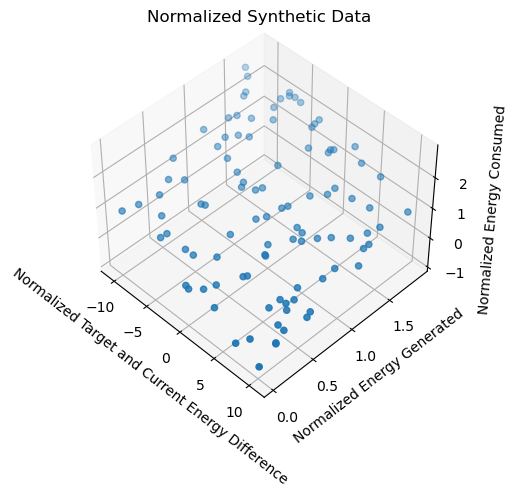

In [4]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xnorm[:,0], xnorm[:,1], ynorm)
ax.view_init(elev=45,azim=315)
ax.set_xlabel('Normalized Target and Current Energy Difference')
ax.set_ylabel('Normalized Energy Generated')
ax.set_zlabel('Normalized Energy Consumed')
ax.set_title('Normalized Synthetic Data')

plt.show()

## Neural Network Function

In [4]:
def DCneuralnet(minVal,maxVal,dropout,neurons,xnorm,ynorm,xtrain,ytrain):

    # define neural network model function that will be the output for 
    # calculating cost

    w1=1
    w2=1
    w3=1
    
    from keras import backend as K
    
    initializer = keras.initializers.RandomUniform(minval= minVal, maxval=maxVal)

    # ann is adaptive to inputs for neuron count, input shape and output shape need to be determined
    model = keras.Sequential([
        keras.layers.Dense(neurons[0], activation=K.elu, input_shape=[2],  kernel_initializer=initializer),
        keras.layers.Dropout(dropout[0]),
        keras.layers.Dense(neurons[1], activation=K.elu,  kernel_initializer=initializer),
        keras.layers.Dropout(dropout[1]),
        keras.layers.Dense(neurons[2], activation=K.elu, kernel_initializer=initializer),
        keras.layers.Dropout(dropout[2]),
        keras.layers.Dense(1,  kernel_initializer=initializer)
      ])


    ##############################################################


    #We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
    #It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
    #RMSprop is an optimizer that’s reliable and fast.
    #We’re compiling the mode using the model.compile function. The loss function used here 
    #is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
    #Number of epochs can be varied.

    #from tf.keras import optimizers
    rms = keras.optimizers.RMSprop(0.02)
    model.compile(loss='mean_absolute_error',optimizer=rms)


    #################################################################


    #After the compilation of the model, we’ll use the fit method with 500 epochs.
    #I started with epochs value of 100 and then tested the model after training. 
    #The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
    #Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
    #I found acceptable prediction accuracy.

    #The fit method takes three parameters; namely, x, y, and number of epochs. 
    #During model training, if all the batches of data are seen by the model once, 
    #we say that one epoch has been completed.

    # Add an early stopping callback
    es = keras.callbacks.EarlyStopping(
        monitor='loss', 
        mode='min', 
        patience = 100, 
        restore_best_weights = True, 
        verbose=0)
    # Add a checkpoint where loss is minimum, and save that model
    mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                         mode='min',  verbose=0, save_best_only=True)

    historyData = model.fit(xtrain,ytrain,epochs=500,verbose=0,callbacks=[es])

    loss_hist = historyData.history['loss']
    #The above line will return a dictionary, access it's info like this:
    best_epoch = np.argmin(historyData.history['loss']) + 1
    # print ('best epoch = ', best_epoch)
    # print('smallest loss =', np.min(loss_hist))

    model.save('./best_model')

    # model_config = model.get_config()
    # recon_model = Sequential.from_config(model_config)
    #################################################################


    # This line of code can be used to reconstruct the saved model.

    recon_model = keras.models.load_model("best_model")

    # the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
    # See the previous project for code to do the comparisons.
    
    Z = np.zeros((len(ytrain),np.size(ytrain,1)))

    for i in range(len(ytrain)):    
        output = model.predict(np.array([ [xtrain[i][0], xtrain[i][1] ]]))
        Z[i,:] = output  
    
    MAEtrain = mean_absolute_error(Z,ytrain, multioutput = 'raw_values')
    
    Z = np.zeros((len(yval),np.size(yval,1)))

    for i in range(len(yval)):    
        output = model.predict(np.array([ [xval[i][0], xval[i][1]]]))
        Z[i,:] = output  
    
    MAEval = mean_absolute_error(Z,yval, multioutput = 'raw_values')
    
    costarr = w1*MAEval + w2*MAEtrain + w3*MAEval/MAEtrain
    cost=costarr[0]
    return cost,MAEval,MAEtrain

        

In [24]:
cost,MAEval,MAEtrain = DCneuralnet(minVal=.1,maxVal=.6,dropout=[.2,.25,.1],neurons=[6,8,4],xnorm=xnorm, ynorm=ynorm,xtrain=xtrain,ytrain=ytrain)

INFO:tensorflow:Assets written to: ./best_model/assets


In [25]:
cost**2

1.3199708747620018

## GA to tune Neural Network

In [8]:
def DC_NN_GA(xnorm,ynorm,xtrain,ytrain):
    
    S=18
    P = 6
    C=6
    G = 15
    TOL_GA=1e-3

    randGen = S - P - C  # random generation

    #number of parameters
    numpar = 8  
    # Upper and lower bounds for each parameter
    minVal_min = -.7
    minVal_max = 0
    maxVal_min = .1
    maxVal_max = .7
    dropoutmin = 0
    dropoutmax = 1/3
    dropoutrange = dropoutmax - dropoutmin
    neuronsmin = 2
    neuronsmax = 16
    neuronsrange = neuronsmax - neuronsmin

    LAM = np.zeros([numpar,S])
    LAM[0,:] = np.random.rand(S) * (minVal_max - minVal_min) + minVal_min
    LAM[1,:] = np.random.rand(S) * (maxVal_max - maxVal_min) + maxVal_min
    LAM[2,:] = np.random.rand(S) * (dropoutrange) + dropoutmin
    LAM[3,:] = np.random.rand(S) * (dropoutrange) + dropoutmin
    LAM[4,:] = np.random.rand(S) * (dropoutrange) + dropoutmin
    # generate random integers within range for neuron count
    LAM[5,:] = np.random.randint(low=neuronsmin, high=neuronsrange, size=S)
    LAM[6,:] = np.random.randint(low=neuronsmin, high=neuronsrange, size=S)
    LAM[7,:] = np.random.randint(low=neuronsmin, high=neuronsrange, size=S)

    # Allocate memory for results
    PI = np.zeros((G, S))
    PI_i = np.zeros((1,S))
    overallMean = []
    parentMean = []
    best = []
    iteration = []

    # parameter so parents dont have to be recalculated
    start=0
    # Start Genetic Algorithm (loop through generations)
    
    for i in range(G):
        
        for k in range(start,S):
            cost,_,_ = DCneuralnet(LAM[0,k],LAM[1,k],[LAM[2,k],LAM[3,k],LAM[4,k]],[LAM[5,k],LAM[6,k],\
                               LAM[7,k]],xnorm,ynorm,xtrain,ytrain)   

            # compute cost
            PI_i[0,k] = cost

        # update start variable to save time
        start=P
        # rank cost values
        rank = PI_i.argsort()      # returns indices of the values
        PI[i, :] = PI_i[0,rank]      # store ranked costs in PI
        PI_i = PI_i[0,rank]    # store ranked costs in PI

        # store results
        overallMean.append(np.mean(PI[i, :]))
        parentMean.append(np.mean(PI[i, :P]))
        best.append(PI[i, 0])
        iteration.append(i)
        print('PIbest = ', PI[i, 0])

        if PI[i, 0] < TOL_GA:
            print("Finished")
            break

        # Place parents back in the gene pool
        LAM = LAM[:,rank]          # redefine LAM as the best ranking parameters
        LAM = np.squeeze(LAM)
        """
        LAM = np.zeros(S)        # reset Design parameters
        LAM[:P] = PI[i, :P]      # keep parents
        """
    #     print('LAM1: ', LAM)
        # Form children
        phi = np.random.rand(numpar,math.floor(C))
        children = np.empty([numpar,C])
        for j in range(0,C,2):
            children [:,j]= (phi[:,j]*LAM[:,j] + (1- phi[:,j])*LAM[:,j+1])
            children[:,j+1] = (phi[:,j+1]*LAM[:,j+1] + (1- phi[:,j+1])*LAM[:,j])
            # children.append(phi[:,j]*LAM[:,j] + (1- phi[:,j])*LAM[:,j+1])
            # children.append(phi[:,j+1]*LAM[:,j+1] + (1- phi[:,j+1])*LAM[:,j])
        children[5:7,:] = np.around(children[5:7,:])
        
        LAM[:,P:(P+C)] = children
        
        # Generate random members of the new generation 
        LAM[0,(P + C):] = np.random.rand(randGen) * (minVal_max - minVal_min) + minVal_min
        LAM[1,(P + C):] = np.random.rand(randGen) * (maxVal_max - maxVal_min) + maxVal_min
        LAM[2,(P + C):] = np.random.rand(randGen) * (dropoutrange) + dropoutmin
        LAM[3,(P + C):] = np.random.rand(randGen) * (dropoutrange) + dropoutmin
        LAM[4,(P + C):] = np.random.rand(randGen) * (dropoutrange) + dropoutmin
        # generate random integers within range for neuron count
        LAM[5,(P + C):] = np.random.randint(low=neuronsmin,high=neuronsrange,size=randGen)
        LAM[6,(P + C):] = np.random.randint(low=neuronsmin,high=neuronsrange,size=randGen)
        LAM[7,(P + C):] = np.random.randint(low=neuronsmin,high=neuronsrange,size=randGen)
    
    #     print('LAMpost: ', LAM)

    print('\nx* = ', LAM[:,0])
    return overallMean, parentMean, best, iteration, LAM,PI[i,:]


In [458]:
np.around(.5)

0.0

## Consider making GA longer, its not horribly slow
## however also not super effective, NN has high loss
## possibly due to how data is distributed

In [9]:
overallMean, parentMean, best, iteration, LAM,PI = \
    DC_NN_GA(xnorm,ynorm,xtrain,ytrain)

2023-04-30 13:07:33.247968: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 13:07:33.248462: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.
2023-04-30 13:07:35.728270: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./best_model/assets
INFO:tensorflow:Assets written to: ./be

## Print results so stored for later

In [10]:
print(overallMean)
print(parentMean)
print(best)
print(iteration)

[1.4566846958145232, 1.3840876093632428, 1.359480573871858, 1.2957265481644302, 1.2365597243405146, 1.2456953997657767, 1.197417215649739, 1.2313036519092158, 1.4215916393823669, 1.294116034392221, 1.4831974677111477, 1.268157286321946, 1.2990705124547737, 1.3124955183051568, 1.2408979378984173]
[1.133343027289624, 1.0991604148241352, 1.0215477380060074, 1.0004006885462415, 0.9672693187138792, 0.9594010159673267, 0.9594010159673267, 0.9573876929927562, 0.9573876929927562, 0.9573876929927562, 0.9573876929927562, 0.9471628768281359, 0.9471628768281359, 0.9444940450030203, 0.9444940450030203]
[0.9790200038347227, 0.9790200038347227, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [316]:
# overallmean = [1.4566846958145232, 1.3840876093632428, 1.359480573871858, 1.2957265481644302, 1.2365597243405146, 1.2456953997657767, 1.197417215649739, 1.2313036519092158, 1.4215916393823669, 1.294116034392221, 1.4831974677111477, 1.268157286321946, 1.2990705124547737, 1.3124955183051568, 1.2408979378984173]
# parentmean=[1.133343027289624, 1.0991604148241352, 1.0215477380060074, 1.0004006885462415, 0.9672693187138792, 0.9594010159673267, 0.9594010159673267, 0.9573876929927562, 0.9573876929927562, 0.9573876929927562, 0.9573876929927562, 0.9471628768281359, 0.9471628768281359, 0.9444940450030203, 0.9444940450030203]
# best=[0.9790200038347227, 0.9790200038347227, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282, 0.8798934181600282]
# it=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [6]:
LAM = np.array([[-3.18671840e-01, -2.01808744e-01, -1.64961998e-01,
        -1.33458698e-01],
       [ 4.31441249e-01,  5.26745677e-01,  4.39479926e-01,
         2.32990042e-01],
       [ 6.28091302e-02,  2.64362480e-01,  3.17395905e-01,
         1.83927425e-01],
       [ 1.10310997e-01,  2.63358280e-01,  2.92698474e-01,
         1.76995666e-01],
       [ 9.93302452e-03,  3.25310519e-01,  2.64485266e-01,
         1.88383960e-01],
       [ 5.00000000e+00,  1.30000000e+01,  1.20000000e+01,
         5.00000000e+00],
       [ 2.00000000e+00,  1.10000000e+01,  4.00000000e+00,
         5.00000000e+00],
       [ 5.99593673e+00,  8.00000000e+00,  2.00000000e+00,
         8.00000000e+00]])

In [12]:
# LAM[:,0] = np.array([-0.31867184,  0.43144125,  0.06280913,  0.110311  ,  0.00993302,
#         5.        ,  2.        ,  5.99593673])

array([-0.31867184,  0.43144125,  0.06280913,  0.110311  ,  0.00993302,
        5.        ,  2.        ,  5.99593673])

In [16]:
# PI = np.array([0.87989342, 0.91639493, 0.93615775, 0.97159486, 0.97902   ,
#        0.9839033 , 1.0482462 , 1.08444141, 1.08731307, 1.21055032,
#        1.2577301 , 1.40835245, 1.45285129, 1.50910843, 1.5418983 ,
#        1.59650304, 1.67789823, 1.79430577])

array([0.87989342, 0.91639493, 0.93615775, 0.97159486, 0.97902   ,
       0.9839033 , 1.0482462 , 1.08444141, 1.08731307, 1.21055032,
       1.2577301 , 1.40835245, 1.45285129, 1.50910843, 1.5418983 ,
       1.59650304, 1.67789823, 1.79430577])

## Plotting cost evolution for Neural Net

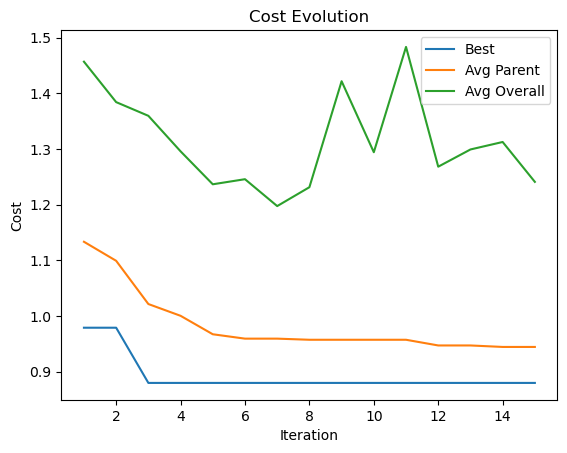

In [318]:
%matplotlib inline
iteration = np.array(it)+1
plt.figure()
plt.plot(iteration,best,label='Best')
plt.plot(iteration,parentmean,label='Avg Parent')
plt.plot(iteration,overallmean,label='Avg Overall')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.title('Cost Evolution')
plt.show()

## optimized Neural Net

In [477]:


neurons = LAM[5:8,0]
dropout = LAM[2:5,0]
w1=1
w2=1
w3=1
minVal=LAM[0,0]
maxVal=LAM[1,0]

from keras import backend as K

initializer = keras.initializers.RandomUniform(minval= minVal, maxval=maxVal)

# ann is adaptive to inputs for neuron count, input shape and output shape need to be determined
model = keras.Sequential([
    keras.layers.Dense(neurons[0], activation=K.elu, input_shape=[2],  kernel_initializer=initializer),
    keras.layers.Dropout(dropout[0]),
    keras.layers.Dense(neurons[1], activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dropout(dropout[1]),
    keras.layers.Dense(neurons[2], activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dropout(dropout[2]),
    keras.layers.Dense(1,  kernel_initializer=initializer)
    ])




        

In [478]:
##############################################################


#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='mean_absolute_error',optimizer=rms)



In [492]:
#################################################################


#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 100, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                        mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xnorm,ynorm,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
# print ('best epoch = ', best_epoch)
# print('smallest loss =', np.min(loss_hist))

model.save('./best_model')



Train on 100 samples
Epoch 1/500
100/100 [==============================] - 0s 436us/sample - loss: 0.2323
Epoch 2/500
100/100 [==============================] - 0s 71us/sample - loss: 0.2602
Epoch 3/500
100/100 [==============================] - 0s 85us/sample - loss: 0.2099
Epoch 4/500
100/100 [==============================] - 0s 77us/sample - loss: 0.1997
Epoch 5/500
100/100 [==============================] - 0s 75us/sample - loss: 0.2169
Epoch 6/500
100/100 [==============================] - 0s 72us/sample - loss: 0.2370
Epoch 7/500
100/100 [==============================] - 0s 73us/sample - loss: 0.2048
Epoch 8/500
100/100 [==============================] - 0s 66us/sample - loss: 0.2367
Epoch 9/500
100/100 [==============================] - 0s 66us/sample - loss: 0.2435
Epoch 10/500
100/100 [==============================] - 0s 65us/sample - loss: 0.2159
Epoch 11/500
100/100 [==============================] - 0s 64us/sample - loss: 0.2396
Epoch 12/500
100/100 [===================

In [507]:
#################################################################


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.

Z = np.zeros((len(ytrain),np.size(ytrain,1)))

for i in range(len(ytrain)):    
    output = model.predict(np.array([ [xtrain[i][0], xtrain[i][1] ]]))
    Z[i,:] = output  

MAEtrain = mean_absolute_error(Z,ytrain, multioutput = 'raw_values')

Z = np.zeros((len(yval),np.size(yval,1)))

for i in range(len(yval)):    
    output = model.predict(np.array([ [xval[i][0], xval[i][1]]]))
    Z[i,:] = output  

MAEval = mean_absolute_error(Z,yval, multioutput = 'raw_values')


In [494]:
print(MAEtrain)
print(MAEval)

[0.06436363]
[0.04870689]


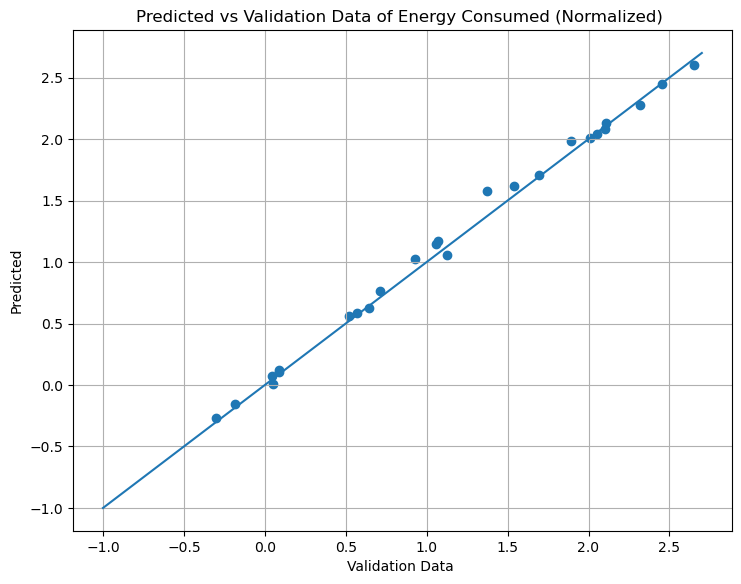

In [508]:
# Quality Plot
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(8.5,6.5)
ax = plt.subplot()
ax.plot(np.linspace(-1,2.7,10), np.linspace(-1,2.7,10)) 
fig.set_size_inches(8.5,6.5) 
plt.scatter(yval[:,0],Z[:,0])
plt.title('Predicted vs Validation Data of Energy Consumed (Normalized) ')
# naming the x axis
plt.xlabel('Validation Data ')
# naming the y axis
plt.ylabel('Predicted')
#plt.loglog()
plt.grid(True, which="both")
plt.show()

## Supporting functions for the EMS Simulation

In [432]:
# function to generate positions of devices, can also be a user input
#bounds is a 2x2

def POSITIONS(N,locations,bounds):
    
    # position of EMS will always be origin, for now (set to y = -5, need to ask Zohdi)
    sup_pos = np.array([0,-5,0],'float')
    
    if not locations:  # check that locations is an empty list
        
        # make positions an array of zeros to be filled in size: Nx3
        positions = np.array([[0] * 3] * N,'float')
        for i in range(N):    # loop through 
            positions[i][0] = bounds[0][0] + (bounds[0][1] - bounds[0][0])*np.random.rand()    # x min + x range * 0<=rand<=1
            positions[i][2] = bounds[1][0] + (bounds[1][1] - bounds[1][0])*np.random.rand()    # y min + y range * 0<=rand<=1
            positions[i][1] = 0
            
    else: # if locations has an input, then user input will decide positions of data centers
        positions = locations
        
        # need to add check that no data centers have coordinates too close, ref summer project
    return positions,sup_pos


# write function to quantify flux between devices

def interFlux(nCustomers,cIcJinterFluxBase,cstateT,ijcon):
    interflux = np.zeros([nCustomers,nCustomers])
    # for i in range(nCustomers):
    #     for j in range(i+1,nCustomers):
    #         interflux[i][j] = ((random.random()-.5)/.5) * cIcJinterFluxBase  # flux i to j
    #         interflux[j][i] = -interflux[i][j]          # flux j to i
    # return interflux
    i=0
    while i < (nCustomers):
        powersent=0
        for j in range(i+1,nCustomers):
            if ijcon[i][j] > 0:
                if cstateT[i] > cstateT[j] :
                    interflux[i][j] = (random.random()) * cIcJinterFluxBase  # flux i to j
                    interflux[j][i] = -interflux[i][j]          # flux j to i
                elif cstateT[i] < cstateT[j]:
                    interflux[i][j] = -(random.random()) * cIcJinterFluxBase  # flux i to j
                    interflux[j][i] = -interflux[i][j]          # flux j to i
                else:
                    interflux[i][j] = 0  # flux i to j
                    interflux[j][i] = 0          # flux j to i

            else:
                interflux[i][j] = 0  # flux i to j
                interflux[j][i] = 0          # flux j to i
            powersent += interflux[i][j]
        if powersent < cstateT[i]: # check if i will have negative energy after power exchange
            i += 1
    return interflux
            
# customer state calculations
# vectorize if necessary
def customerState(nCustomers,cgenbase,cConsumedbase):
    cgen = np.zeros([1,nCustomers])
    cconsume = np.zeros([1,nCustomers])
    for i in range(nCustomers):
        pop = (random.random()-0.5)/0.5
        cgen[0][i] = cgenbase*random.random()
        pop = (random.random()-0.5)/0.5
        cconsume[0][i] = cConsumedbase*random.random()
    return cgen, cconsume

In [414]:
S = 10
nCustomers = 8
cIcJinterFluxBase = 100
cstateT = 1e6*np.random.rand(nCustomers)
# form lambda
lam = np.zeros([S,nCustomers,nCustomers])
for k in range(S):
    i = 0
    
    while i < (nCustomers):
        powersent=0
        for j in range(i+1,nCustomers):
            if ijcon[i][j] > 0:
                if cstateT[i] > cstateT[j] :
                    lam[k][i][j] = (random.random()) * cIcJinterFluxBase  # flux i to j
                    lam[k][j][i] = -lam[k][i][j]          # flux j to i
                elif cstateT[i] < cstateT[j]:
                    lam[k][i][j] = -(random.random()) * cIcJinterFluxBase  # flux i to j
                    lam[k][j][i] = -lam[k][i][j]          # flux j to i
                else:
                    lam[k][i][j] = 0  # flux i to j
                    lam[k][j][i] = 0          # flux j to i

            else:
                lam[k][i][j] = 0  # flux i to j
                lam[k][j][i] = 0          # flux j to i
            powersent += lam[k][i][j]
        if powersent < cstateT[i]: # check if i will have negative energy after power exchange
            i += 1
            # if i == 1:
            #     print('power sent: ',powersent)
            #     print('cstate[N]: ',cstateT[i])
        

In [292]:
lam

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  83.30543784],
        [  0.        ,   0.        ,  95.49203105, ...,  48.52172516,
          15.37114304,  38.99231933],
        [  0.        , -95.49203105,   0.        , ...,   8.71785279,
           0.        ,  52.85596152],
        ...,
        [  0.        , -48.52172516,  -8.71785279, ...,   0.        ,
           0.        ,  90.1976892 ],
        [  0.        , -15.37114304,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [-83.30543784, -38.99231933, -52.85596152, ..., -90.1976892 ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  28.52430786],
        [  0.        ,   0.        ,  95.72466182, ...,  98.77351642,
          90.43728038,  29.75441593],
        [  0.        , -95.72466182,   0.        , ...,  87.32335185,
           0.        ,  25.63402925],
        ...,


## EMS Genetic Algorithm

In [459]:
########################################## GENETIC ALGORITHM

# goal is to minimize line losses, supply losses, and overall demand
# lambda will be a vector of matrices

def emsGA(N,w1,w2,w3,deltaT,positions,ijcon,targ,cIcJinterFluxBase,sstateT,sstateTpDT,cstateT,cstateTpDT, \
          supply,resupply,cgen,cconsume):
    # define variables for GA
    
    G = 10
    S = 12
    P = 4
    C = 4
    minTol = .0001
    MJ = 1000000
    totalcostGA = 0  # initialize totalcost as 0
    connectivitylevel = .5
    targetBase = 1
    ampTarget = .01
    nCustomers = N
    totaldemand = 0
    totallosses = 0
    totalsupplylosses = 0
    cgenbase = 100
    cConsumedbase = 100
    cIcJinterFluxBase = 1e4
    #loss per unit length
    lossPUL = .05
    sup_pos = np.array([0,-5,0],'float')
    supply0 = copy.copy(supply)
    resupply0 = copy.copy(resupply)
    # supply = np.zeros(nCustomers)
    # resupply = np.zeros(nCustomers)
    # # initial customer conditions
    cstateT0 = copy.copy(cstateT)
    cstateTpDT0 = copy.copy(cstateTpDT)
    # cstateT = np.zeros(nCustomers)
    # cstateTpDT = np.zeros(nCustomers)
    
    # #initial storage unit system conditions
    sstateT0 = copy.copy(sstateT)
    sstateTpDT0 = copy.copy(sstateTpDT)
    # sstateT = 0
    # sstateTpDT = 0
    
    # numlam = math.floor((N-1)*(N)/2 + N )
    # number of variables in lambda is number of energy sent between each device pair 
    # plus energy sent from supplier to each device
    # eg 5 devices, 10 pairs --> AB,AC,AD,AE,BC,BD,BE,CD,CE,DE
    
    
    # form lambda
    lam = np.zeros([S,nCustomers,nCustomers])
    for k in range(S):
        i = 0
        
        while i < (nCustomers):
            powersent=0
            for j in range(i+1,nCustomers):
                if ijcon[i][j] > 0:
                    if cstateT[i] > cstateT[j] :
                        lam[k][i][j] = (random.random()) * cIcJinterFluxBase  # flux i to j
                        lam[k][j][i] = -lam[k][i][j]          # flux j to i
                    elif cstateT[i] < cstateT[j]:
                        lam[k][i][j] = -(random.random()) * cIcJinterFluxBase  # flux i to j
                        lam[k][j][i] = -lam[k][i][j]          # flux j to i
                    else:
                        lam[k][i][j] = 0  # flux i to j
                        lam[k][j][i] = 0          # flux j to i

                else:
                    lam[k][i][j] = 0  # flux i to j
                    lam[k][j][i] = 0          # flux j to i
                powersent += lam[k][i][j]
            if powersent < cstateT[i]: # check if i will have negative energy after power exchange
                i += 1
                # if i == 1:
                #     print('power sent: ',powersent)
                #     print('cstate[N]: ',cstateT[i])

    

    # lambda has been formed
    # lets get genetic
    # print('lam: ',lam[0][0][0])
    # print('cstateT: ', cstateT[0])
    start = 0
    Pi = np.zeros([S,1])
    Pi_i = np.zeros([S,G]) # Pi index
    Min = np.zeros([G,1])
    pAve = np.zeros([G,1])
    totAve = np.zeros([G,1])
    iteration = []
    

    tol = 1
    Gen = 0

    # tol > minTol and
    while  Gen < G:
        # totaldemand = 0
        # totallosses = 0
        # totalsupplylosses = 0
        
        # # initial customer conditions
        # cstateT = np.zeros(nCustomers)
        # cstateTpDT = np.zeros(nCustomers)

        # #initial storage unit system conditions
        # sstateT = 0
        # sstateTpDT = 0
        
        for k in range(start,S):
            # for each string, new supply and state values
            totaldemand = 0
            totallosses = 0
            totalsupplylosses = 0
            penalty = 0 # peanlty for devices with negative energy
            supply = copy.copy(supply0)
            resupply = copy.copy(resupply0)
            cstateT = copy.copy(cstateT0)
            cstateTpDT = copy.copy(cstateTpDT0)
            sstateT = copy.copy(sstateT0)
            sstateTpDT = copy.copy(sstateTpDT0)

            
            losses1 = 0
            losses2 = 0

            # loop through all customer-customer pairs to 
            for i in range(nCustomers):
                sum1 = 0
                for j in range(nCustomers):
                    if i <= j:
                        # distance does not include y values since all devices are assume to be on a flat plane, this can be changed later
                        distance= np.sqrt( (positions[i][0] - positions[j][0])**2 + (positions[i][2] - positions[j][2])**2) 
                    if ijcon[i][j]*lam[k][i][j] > 0: # positive lam indicates power leaving device i, that amount of power doesnt care about losses
                        alphaij = 1
                    elif ijcon[i][j]*lam[k][i][j] <= 0:
                        alphaij = math.exp(-lossPUL*distance) # power received by device with less power from device with more power

                    sum1 = ijcon[i][j]*lam[k][i][j]*alphaij + sum1  # sum of power transferred to (negative) or from (positive) device i (+ for power sent)
                    losses1 = abs(ijcon[i][j]*lam[k][i][j])*(1-alphaij)*deltaT+losses1  # losses from device to device
                # end j for loop

                # local supply needed calculation
                # gamma determines how much power device i needs from supplier (higher gamma, more power required)
                
                gamma = (targ[i]-cstateT[i])/deltaT - (cgen[0][i]-cconsume[0][i]-sum1)
                distance = np.sqrt( (positions[i][0] - sup_pos[0])**2 + (positions[i][1] - sup_pos[1])**2 + (positions[i][2] - sup_pos[2])**2)
                
                if (cstateT[i]  - cconsume[0][i] + cgen[0][i] - sum1) < 0:
                    penalty = penalty + (0 - (cstateT[i]  - cconsume[0][i] + cgen[0][i] - sum1))
                    
                # supply is from supplier to customer (minimize)
                # resupply is from customer to supplier (maximize)
                # Needs energy from supplier, overcompensate for control volume Supply
                if gamma > 0:
                    supply[i] = gamma*math.exp(lossPUL*distance)
                    resupply[i] = 0
                    losses2 = abs(supply[i])*(1-math.exp(-lossPUL*distance))*deltaT+losses2

                # send supplies, include losses
                if gamma <= 0:
                    resupply[i] = gamma*math.exp(-lossPUL*distance)
                    supply[i] = 0
                    losses2 = abs(gamma)*(1-math.exp(-lossPUL*distance))*deltaT + losses2

                # Local state calculation
                cstateTpDT[i] = cstateT[i] + deltaT*(cgen[0][i]-cconsume[0][i]-sum1+gamma)
            
                # update customer state
                cstateT[i] = cstateTpDT[i]

                

            # end i for loop
            
            ############# PHYSICS MODELING ENDS ##################

            ############## COST CALCULATION ################
            # update storage unit vontrol volume S
            
            # measure of energy regained on the timestep
            sum2 = sum(supply + resupply)

            # storage unit state
            sstateTpDT = sstateT - deltaT*sum2
            sstateT = sstateTpDT

            # quantities for cost function

            totaldemand = -sum2*deltaT 
            totallosses =  (losses1+losses2)
            totalsupplylosses = losses2

            # skip graphics portion

            totalcostGA =  w1*totallosses/MJ + w2*totalsupplylosses/MJ + w3*totaldemand/MJ + penalty
            Pi[k][0] = totalcostGA

        # k for loop ends

        ind = (np.argsort(Pi,axis=0)).astype(int) # index of how to sort the Pi values from least to greatest

#         Pi = np.sort(Pi)  # sort Pi values
#         print(Pi)
        # create a copy of Pi and lam so we call on unmodified array when sorting strings
        PiNew = copy.copy(Pi)
        lamNew = copy.copy(lam)
        # order lam by best performing strings
        for kk in range(len(ind)):
            Pi[kk] = PiNew[ind[kk]]
            lam[kk,:,:] = lamNew[ind[kk],:,:]
        # end kk for loop
        

        phi = np.random.rand(math.floor(C),nCustomers,nCustomers)

        parents = lam[0:P,:,:]  # save top P performing strings

        # np.arange(starting index, end {start + step must be less than end}, step)

        children = []
        for j in range(0,C,2):
            children.append(phi[j,:,:]*lam[j,:,:] + (1- phi[j,:,:])*lam[j+1,:,:])
            children.append(phi[j+1,:,:]*lam[j+1,:,:] + (1- phi[j+1,:,:])*lam[j,:,:])
        # end j for loop

        # # generate mutation strings
        rando = np.zeros([S-P-C,nCustomers,nCustomers])
        # for k in range(S-P-C):
        #     for i in range(nCustomers):
        #         for j in range(i+1,nCustomers):
        #             rando[k][i][j] = ((random.random()-.5)/.5) * cIcJinterFluxBase  # flux i to j
        #             rando[k][j][i] = -rando[k][i][j]          # flux j to i 
        for k in range(S-P-C):
            i = 0
            powersent=0
            while i < (nCustomers):
                for j in range(i+1,nCustomers):
                    if ijcon[i][j] > 0:
                        rando[k][i][j] = ((random.random()-.5)/.5) * cIcJinterFluxBase  # flux i to j
                        rando[k][j][i] = -rando[k][i][j]          # flux j to i 
                    else:
                        rando[k][i][j] = 0  # flux i to j
                        rando[k][j][i] = 0          # flux j to i
                    powersent += rando[k][i][j]
                if powersent < cstateT[i]: # check if i will have negative energy after power exchange
                    i += 1
        
        lam[P:(P+C),:,:] = children
        lam[(P+C):S,:,:] = rando

        Pi_i[:,Gen] = Pi[:,0]
        Min[Gen][0] = Pi[0]
        pAve[Gen][0] = stat.mean(Pi[0:P,0])
        totAve[Gen][0] = stat.mean(Pi[:,0])
        iteration.append(Gen)
        Gen += 1
        start = P # this avoids recalculating the parameters for parents, whose cost is already known

        tol = Pi[0]
        
    # end while loop
    # print('Pi: ',Pi[0])
    # print('total demand: ',totaldemand)
    return Pi,Pi_i,Min,pAve,totAve, lam[0,:,:],iteration
# end function
        
        
        
        
            
                
        

In [395]:
nCustomers = 8
ijcon = np.zeros([nCustomers,nCustomers])
for i in range(nCustomers):
        for j in range(nCustomers):
            if i != j:
                rand = np.random.rand(1)
                
                if rand <= connectivitylevel:
                    ijcon[i][j] = 1
                    ijcon[j][i] = 1

In [359]:
sum(sum(ijcon,1))


314.0

## EMS Simulation paired with Genetic Algorithm

In [460]:
def emsSIMwGA(N, locations, bounds,w1,w2,w3,ijcon):
    
    # define a bunch of the variables
    # megawatts
    MJ = 1000000
    connectivitylevel = .5
    targetBase = 1e6
    ampTarget = 1e4

    cState0 = 1e6
    sState0 = 1e8
    
    #loss per unit length
    lossPUL = .05
    
    nCustomers  = N
    
    # why sizes?
    csize = 1.5
    ssize = 3
    
    # variation of position amplitudes
    sAmpx = 0
    sAmpy = 0
    sAmpz = 0
    
    
    # base values
    
    cgenbase = 1e4
    cConsumedbase = 1e4
    cIcJinterFluxBase = 1e5
    
    # define matrices
    targ = np.ones(nCustomers)
    supply = np.zeros(nCustomers)
    resupply = np.zeros(nCustomers)
    

        
    # i to j connectivity, zohdi calls it cicjon, whether or not two devices are connected
    # ijcon = np.zeros([nCustomers,nCustomers])
    
#     for i in range(nCustomers):
#         for j in range(nCustomers):
#             if i != j:
# #######################################################################
#                 rand = np.random.rand(1)
# #######################################################################              
#                 if rand <= connectivitylevel:
#                     ijcon[i][j] = 1
#                     ijcon[j][i] = 1
                    
    # initial customer conditions
    cstateT = cState0*np.random.rand(nCustomers)
    cstateTpDT = cState0*np.ones(nCustomers)
    
    #initial storage unit system conditions
    sstateT = sState0
    sstateTpDT = sState0
     
    # function for overall sim will go here, lets define supporting 
    # functions first
    
    # the processes 
    timelimit = 100
    time = 0
    deltaT = 1
    lasttime = 0
    movieframes = 100
    totaldemand = 0
    totallosses = 0
    totalcost = 0  # initialize totalcost as 0, it will grow with each timestep
    totalsupplylosses = 0
    
    # Create positions of devices and supplier
    # position of EMS will always be origin, for now (randomly set to y = -5, need to ask Zohdi)
    sup_pos = np.array([0,-5,0],'float')
    
    if not locations:  # check that locations is an empty list
        
        # make positions an array of zeros to be filled in size: Nx3
        positions = np.array([[0] * 3] * N,'float')
        for i in range(N):    # loop through 
            positions[i][0] = bounds[0][0] + (bounds[0][1] - bounds[0][0])*np.random.rand()    # x min + x range * 0<=rand<=1
            positions[i][2] = bounds[1][0] + (bounds[1][1] - bounds[1][0])*np.random.rand()    # z min + z range * 0<=rand<=1
            positions[i][1] = 0
            
    else: # if locations has an input, then user input will decide positions of data centers
        positions = locations
    
    # # pre-simulation energies for each device
    # initialE = np.random.rand(1,N)
    # cstateT = initialE
    while time < timelimit:
        
        ## generate target energy each device 
        # targetE = np.random.rand(1,N)
        # generate uniform target energy in each device
        # use targ

        # # generate energy consumed by each device
        # Econ = np.random.rand(1,N)
        # # generate energy generated by each device
        # Egen = np.random.rand(1,N)

        # flux between devices -- THIS IS WHAT WE MANIPULATE IN THE GA
        # interflux = interFlux(nCustomers,cIcJinterFluxBase)
        # customer state calculation
        cgen,cconsume = customerState(nCustomers,cgenbase,cConsumedbase)
        losses1 = 0
        losses2 = 0
        # target values for local units
        targ = targetBase + (ampTarget*((np.random.rand(N)-0.5)*2))
        
        Pi,Pi_i,Min,pAve,totAve,lam,iteration = emsGA(N,w1,w2,w3,deltaT,positions,ijcon,targ,cIcJinterFluxBase,sstateT,sstateTpDT,cstateT,cstateTpDT, \
          supply,resupply,cgen,cconsume)
        
        # loop through all customer-customer pairs to 
        for i in range(nCustomers):
            sum1 = 0
            for j in range(nCustomers):
                if i <= j:
                    # distance does not include y values since all devices are assume to be on a flat plane, this can be changed later
                    distance= np.sqrt( (positions[i][0] - positions[j][0])**2 + (positions[i][2] - positions[j][2])**2) 
                if ijcon[i][j]*lam[i][j] > 0:
                    alphaij = 1
                elif ijcon[i][j]*lam[i][j] <= 0:
                    alphaij = math.exp(-lossPUL*distance) # power received by device with less power from device with more

                sum1 = ijcon[i][j]*lam[i][j]*alphaij + sum1  # sum of power transferred to or from device i
                losses1 = abs(ijcon[i][j]*lam[i][j])*(1-alphaij)*deltaT+losses1  # losses from device to device
            # end j for loop

            # local supply needed calculation
            # gamma determines whether device i needs from or will supply power to the supplier 
            gamma = (targ[i]-cstateT[i])/deltaT - (cgen[0][i]-cconsume[0][i]-sum1)
            distance = np.sqrt( (positions[i][0] - sup_pos[0])**2 + (positions[i][1] - sup_pos[1])**2 + (positions[i][2] - sup_pos[2])**2)
            
            # Needs energy from supplier, overcompensate for control volume Supply
            if gamma > 0:
                supply[i] = gamma*math.exp(lossPUL*distance)
                resupply[i] = 0
                losses2 = abs(supply[i])*(1-math.exp(-lossPUL*distance))*deltaT+losses2

            # send supplies, include losses
            if gamma <= 0:
                resupply[i] = gamma*math.exp(-lossPUL*distance)
                supply[i] = 0
                losses2 = abs(gamma)*(1-math.exp(-lossPUL*distance))*deltaT + losses2

            # Local state calculation
            cstateTpDT[i] = cstateT[i] + deltaT*(cgen[0][i]-cconsume[0][i]-sum1+gamma)

            # update customer state
            cstateT[i] = cstateTpDT[i]

        # end i for loop
        
        ############# PHYSICS MODELING ENDS ##################

        ############# COST CALCULATION
        # update storage unit vontrol volume S
        
        # measure of energy regained on the timestep
        sum1 = sum(supply + resupply)

        # storage unit state
        sstateTpDT = sstateT - deltaT*sum1
        sstateT = sstateTpDT

        totalcost = totalcost + Pi[0]
        time += deltaT
        
        
    
    return totalcost, Pi_i,Min,pAve,totAve,iteration
        

In [462]:
totalcost, Pi_i,Min,pAve,totAve,iteration = emsSIMwGA(N=8, locations=[], bounds=[[-10,10],[-10,10]],w1=1,w2=1,w3=0,ijcon=ijcon)
totalcost
   

array([13.86255857])

In [468]:
totalcost = emsSIM(N=8, locations=[], bounds=[[-10,10],[-10,10]],w1=1,w2=1,w3=0,ijcon=ijcon)
totalcost 

1851.6525947018247
6500.229377220598
9917.509824442423
6352.255825211608
3310.2554828845286
8646.520121876654
18.881093045786113
5780.4124046451025
6864.93171565907
6532.500317551244
4523.139167834165
2372.4087017086704
7251.466400412447
7343.509717304814
825.0714485396849
6019.745615258695
7567.920958062183
7445.751725012719
8149.784006279316
8000.245667479904
3608.103992239241


26.939290090782684

In [419]:
totalcost

911757.8960856075

## Simulation, No GA

In [467]:
# N - number of devices connected to the supplier
# locations - Nx2 list -  positions of each device, will be renamed  
#             after check to see if empty. If empty -> rand gen
# bounds - 2x2 list - x and y bounds of where devices can be located [xlow, xhigh; ylow, yhigh]

def emsSIM(N, locations, bounds,w1,w2,w3,ijcon):
    
    # define a bunch of the variables
    # megawatts
    MJ = 1000000
    connectivitylevel = .5
    targetBase = 1e6
    ampTarget = 1e4

    cState0 = 1e6
    sState0 = 1e8
    
    #loss per unit length
    lossPUL = .05
    
    nCustomers  = N
    
    # why sizes?
    csize = 1.5
    ssize = 3
    
    # variation of position amplitudes
    sAmpx = 0
    sAmpy = 0
    sAmpz = 0
    
    # base values
    
    cgenbase = 1e4
    cConsumedbase = 1e4
    cIcJinterFluxBase = 1e4
    
    # define matrices
    targ = np.ones(nCustomers)
    supply = np.zeros(nCustomers)
    resupply = np.zeros(nCustomers)
    
    
        
    # i to j connectivity, zohdi calls it cicjon, whether or not two devices are connected
    # ijcon = np.zeros([nCustomers,nCustomers])
    
    # for i in range(nCustomers):
    #     for j in range(nCustomers):
    #         if i != j:
    #             rand = np.random.rand(1)
                
    #             if rand <= connectivitylevel:
    #                 ijcon[i][j] = 1
    #                 ijcon[j][i] = 1
                    
    # initial customer conditions
    cstateT = cState0*np.ones(nCustomers)
    cstateTpDT = cState0*np.ones(nCustomers)
    
    #initial storage unit system conditions
    sstateT = sState0
    sstateTpDT = sState0
     
    # function for overall sim will go here, lets define supporting 
    # functions first
    
    # the processes 
    timelimit = 20
    time = 0
    deltaT = 1
    lasttime = 0
    movieframes = 100
    totaldemand = 0
    totallosses = 0
    totalsupplylosses = 0
    totalcost = 0
    
    # Create positions of devices and supplier
    # position of EMS will always be origin, for now (randomly set to z = -5, need to ask Zohdi)
    sup_pos = np.array([0,-5,0],'float')
    
    if not locations:  # check that locations is an empty list
        
        # make positions an array of zeros to be filled in size: Nx3
        positions = np.array([[0] * 3] * N,'float')
        for i in range(N):    # loop through 
            positions[i][0] = bounds[0][0] + (bounds[0][1] - bounds[0][0])*np.random.rand()    # x min + x range * 0<=rand<=1
            positions[i][2] = bounds[1][0] + (bounds[1][1] - bounds[1][0])*np.random.rand()    # z min + z range * 0<=rand<=1
            positions[i][1] = 0 # y axis is vertical
            
    else: # if locations has an input, then user input will decide positions of data centers
        positions = locations

    # THIS IS WHERE THE PHYSICS MODELING BEGINS

    while time <= timelimit:
        # pre-simulation energies for each device
        initialE = np.random.rand(1,N)
        # generate target energy each device 
        targetE = np.random.rand(1,N)
        # generate uniform target energy in each device
        # use targ
        # target values for local units
        targ = targetBase + (ampTarget*((np.random.rand(N)-0.5)*2))
        
        # generate energy consumed by each device
        Econ = np.random.rand(1,N)
        # generate energy generated by each device
        Egen = np.random.rand(1,N)

        # flux between devices -- THIS IS WHAT WE MANIPULATE IN THE GA
        interflux = interFlux(nCustomers,cIcJinterFluxBase,cstateT,ijcon)
        # customer state calculation
        cgen,cconsume = customerState(nCustomers,cgenbase,cConsumedbase)
        losses1 = 0
        losses2 = 0
        print(cconsume[0][0])
        penalty = 0 # peanlty for devices with negative energy
        # loop through all customer-customer pairs to 
        for i in range(nCustomers):
            sum1 = 0
            for j in range(nCustomers):
                if i <= j:
                    # distance does not include y values since all devices are assume to be on a flat plane, this can be changed later
                    distance= np.sqrt( (positions[i][0] - positions[j][0])**2 + (positions[i][2] - positions[j][2])**2) 
                if ijcon[i][j]*interflux[i][j] > 0:
                    alphaij = 1
                elif ijcon[i][j]*interflux[i][j] <= 0:
                    alphaij = math.exp(-lossPUL*distance) # power received by device with less power from device with more
                
                sum1 = ijcon[i][j]*interflux[i][j]*alphaij + sum1  # sum of power transferred to or from device i
                losses1 = abs(ijcon[i][j]*interflux[i][j])*(1-alphaij)*deltaT+losses1  # losses from device to device
            # end j for loop
            
            # local supply needed calculation
            # gamma determines whether device i needs from or will supply power to the supplier 
            gamma = (targ[i]-cstateT[i])/deltaT - (cgen[0][i]-cconsume[0][i]-sum1)
            distance = np.sqrt( (positions[i][0] - sup_pos[0])**2 + (positions[i][1] - sup_pos[1])**2 + (positions[i][2] - sup_pos[2])**2)
            

            if (cstateT[i]  - cconsume[0][i] + cgen[0][i] - sum1) < 0:
                penalty = penalty + abs(0 - (cstateT[i]  - cconsume[0][i] + cgen[0][i] - sum1))
                
            # Needs energy from supplier, overcompensate for control volume Supply
            if gamma > 0:
                supply[i] = gamma*math.exp(lossPUL*distance)
                resupply[i] = 0
                losses2 = abs(supply[i])*(1-math.exp(-lossPUL*distance))*deltaT+losses2
            
            # send supplies, include losses
            if gamma <= 0:
                resupply[i] = gamma*math.exp(-lossPUL*distance)
                supply[i] = 0
                losses2 = abs(gamma)*(1-math.exp(-lossPUL*distance))*deltaT + losses2
            
            # Local state calculation
            cstateTpDT[i] = cstateT[i] + deltaT*(cgen[0][i]-cconsume[0][i]-sum1+gamma)
            
            # update customer state
            cstateT[i] = cstateTpDT[i]

          
        # end i for loop
        # PHYSICS MODELING ENDS
        
        # COST IS CALCULATED
        # update storage unit vontrol volume S
        sum1 = 0 
        for i in range(nCustomers):
            sum1 = (supply[i] + resupply[i])+sum1
        # end for loop
        
        # storage unit state
        sstateTpDT = sstateT - deltaT*sum1
        sstateT = sstateTpDT
        
        # quantities for cost function
        
        totaldemand = -sum1*deltaT + totaldemand
        totallosses = totallosses + (losses1+losses2)
        totalsupplylosses  = totalsupplylosses + losses2
        
        # skip graphics portion
        
        # totalcost builds on each timestep
        totalcost = totalcost + w1*totallosses/MJ + w2*totalsupplylosses/MJ + w3*totaldemand/MJ + penalty
        
        # update time step
        time = deltaT + time
        
    return totalcost
    # end while loop for time
    
    # what is override?

## Plot for single run of EMS GA

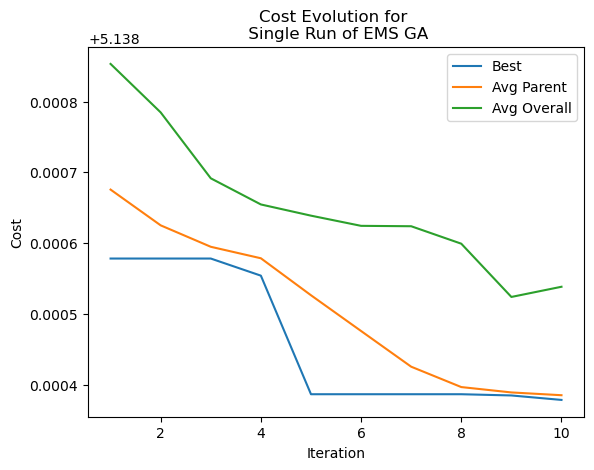

In [389]:
%matplotlib inline
iteration = np.array(iteration)+1
plt.figure()
plt.plot(iteration,Min,label='Best')
plt.plot(iteration,pAve,label='Avg Parent')
plt.plot(iteration,totAve,label='Avg Overall')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.title('Cost Evolution for \n Single Run of EMS GA')
plt.show()

## EMS Sim paired with GA using NN

In [519]:
recon_model = keras.models.load_model("best_model")
N = 8
locations = []
bounds = [[-10, 10],[-10, 10]]
w1=1
w2=1
w3=0
    
# define a bunch of the variables
# megawatts
MJ = 1000000
connectivitylevel = .5
targetBase = 1e6
ampTarget = 1e4

cState0 = 1e6
sState0 = 1e8

#loss per unit length
lossPUL = .05

nCustomers  = N

# why sizes?
csize = 1.5
ssize = 3

# variation of position amplitudes
sAmpx = 0
sAmpy = 0
sAmpz = 0

# define variables for GA

G = 10
S = 12
P = 4
C = 4
minTol = .0001

# base values

cgenbase = 1e4
cConsumedbase = 1e4
cIcJinterFluxBase = 1e5
    
# define matrices
targ = np.ones(nCustomers)
supply = np.zeros(nCustomers)
resupply = np.zeros(nCustomers)

# target values for local units
# for i in range(nCustomers):
#     pop = (np.random.rand(1) - .5) * 2
#     targ[i] = targetBase+(ampTarget*pop)   # .99e6 <= targ <= 1.01e6 for all devices
targ = targetBase + (ampTarget*((np.random.rand(N)-0.5)*2))
# i to j connectivity, zohdi calls it cicjon, whether or not two devices are connected
ijcon = np.zeros([nCustomers,nCustomers])

for i in range(nCustomers):
    for j in range(nCustomers):
        if i != j:
#######################################################################
            rand = np.random.rand(1)
#######################################################################              
            if rand <= connectivitylevel:
                ijcon[i][j] = 1
                ijcon[j][i] = 1
                
# initial customer conditions
cstateT = np.random.rand(N)*1e6
cstateTpDT = cState0*np.ones(nCustomers)

#initial storage unit system conditions
sstateT = np.random.rand()*1e8
sstateTpDT = sState0
    
# function for overall sim will go here, lets define supporting 
# functions first

# the processes 
timelimit = 100
time = 0
deltaT = 1
lasttime = 0
movieframes = 100
totaldemand = 0
totallosses = 0
totalcost = 0  # initialize totalcost as 0, it will grow with each timestep
totalsupplylosses = 0

# Create positions of devices and supplier
# position of EMS will always be origin, for now (randomly set to z = -5, need to ask Zohdi)
sup_pos = np.array([0,-5,0],'float')

if not locations:  # check that locations is an empty list
    
    # make positions an array of zeros to be filled in size: Nx3
    positions = np.array([[0] * 3] * N,'float')
    for i in range(N):    # loop through 
        positions[i][0] = bounds[0][0] + (bounds[0][1] - bounds[0][0])*np.random.rand()    # x min + x range * 0<=rand<=1
        positions[i][2] = bounds[1][0] + (bounds[1][1] - bounds[1][0])*np.random.rand()    # y min + y range * 0<=rand<=1
        positions[i][1] = 0
        
else: # if locations has an input, then user input will decide positions of data centers
    positions = locations

# pre-simulation energies for each device
initialE = np.random.rand(N,1)*1e6

# generate energy consumed by each device
Econ = np.zeros((N,1))
# generate target energy each device 
targetE = np.random.rand(N,1)*1e6

while time <= timelimit:
    
    
    # generate uniform target energy in each device
    # use targ
    # flux between devices -- THIS IS WHAT WE MANIPULATE IN THE GA
    ########### DOUBLE CHECK ##############
    # interflux = interFlux(nCustomers,cIcJinterFluxBase)
    # customer state calculation
    cgen,cconsume = customerState(nCustomers,cgenbase,cConsumedbase)
    losses1 = 0
    losses2 = 0
    targ = targetBase + (ampTarget*((np.random.rand(N)-0.5)*2))
    # generate energy generated by each device
    # add neural net
    # Egen = np.random.rand(N,1)*1e6
    med1 = stat.median(cstateT-targ)


    ######## SOURCE OF ALL HEADACHES: cgen is like a double array or some shit
    ############################### use double indexing to extract values
    med2 = stat.median(cgen[0])
    
    # input1 = np.asarray(input1).astype('float32')
    # cstateT = np.asarray(cstateT).astype('float32')
    # input1 = tf.convert_to_tensor(input1)
    # cstateT = tf.convert_to_tensor(cstateT)
    for i in range(N): 
        # print('input1: ',cstateT[i]-targ[i])
        output = model.predict(np.array([ [ (cstateT[i]-targ[i]) /med1 , cgen[0][i]/med2  ]] ) )
        #output = model.predict(tf.Tensor([ input1[i], cstateT[i]],value_index=float,dtype=float))
        cconsume[0][i] = output  *ymed
       
            

    
    
    Pi,Pi_i,Min,pAve,totAve,lam,_ = emsGA(N,w1,w2,w3,deltaT,positions,ijcon,targ,cIcJinterFluxBase,sstateT,sstateTpDT,cstateT,cstateTpDT, \
          supply,resupply,cgen,cconsume)
    # loop through all customer-customer pairs to 
    for i in range(nCustomers):
        sum1 = 0
        for j in range(nCustomers):
            if i <= j:
                # distance does not include y values since all devices are assume to be on a flat plane, this can be changed later
                distance= np.sqrt( (positions[i][0] - positions[j][0])**2 + (positions[i][2] - positions[j][2])**2) 
            if ijcon[i][j]*lam[i][j] > 0:
                alphaij = 1
            elif ijcon[i][j]*lam[i][j] <= 0:
                alphaij = math.exp(-lossPUL*distance) # power received by device with less power from device with more

            sum1 = ijcon[i][j]*lam[i][j]*alphaij + sum1  # sum of power transferred to or from device i
            losses1 = abs(ijcon[i][j]*lam[i][j])*(1-alphaij)*deltaT+losses1  # losses from device to device
        # end j for loop

        # local supply needed calculation
        # gamma determines whether device i needs from or will supply power to the supplier 
        gamma = (targ[i]-cstateT[i])/deltaT - (cgen[0][i]-cconsume[0][i]-sum1)
        distance = np.sqrt( (positions[i][0] - sup_pos[0])**2 + (positions[i][1] - sup_pos[1])**2 + (positions[i][2] - sup_pos[2])**2)

        # Needs energy from supplier, overcompensate for control volume Supply ?? (ask Zohdi)
        if gamma > 0:
            supply[i] = gamma*math.exp(lossPUL*distance)
            resupply[i] = 0
            losses2 = abs(supply[i])*(1-math.exp(-lossPUL*distance))*deltaT+losses2

        # send to supplier, include losses
        if gamma <= 0:
            resupply[i] = gamma*math.exp(-lossPUL*distance)
            supply[i] = 0
            losses2 = abs(gamma)*(1-math.exp(-lossPUL*distance))*deltaT + losses2

        # Local state calculation
        cstateTpDT[i] = cstateT[i] + deltaT*(cgen[0][i]-cconsume[0][i]-sum1+gamma)

        # update customer state
        cstateT[i] = cstateTpDT[i]

    # end i for loop
    
    ############# PHYSICS MODELING ENDS ##################

    ############# COST CALCULATION
    # update storage unit vontrol volume S
    
    # measure of energy regained on the timestep
    sum1 = sum(supply + resupply)

    # storage unit state
    sstateTpDT = sstateT - deltaT*sum1
    sstateT = sstateTpDT

    totalcost = totalcost + Pi[0]
    time += deltaT
    

        

In [520]:
totalcost

array([15.6778971])

In [83]:
sum1

3407818478691849.0

In [54]:
# pre-simulation energies for each device
initialE = np.random.rand(N,1)*1e6
cstateT = initialE
# generate energy consumed by each device
Econ = np.zeros((N,1))
# generate target energy each device 
targetE = np.random.rand(N,1)*1e6
time  = 0
while time <= 10:
    
    
    # generate uniform target energy in each device
    # use targ

    # generate energy generated by each device
    # add neural net
    Egen = np.random.rand(N,1)*1e6
    input1 = np.array(Egen-targetE )
    
    # input1 = np.asarray(input1).astype('float32')
    # cstateT = np.asarray(cstateT).astype('float32')
    # input1 = tf.convert_to_tensor(input1)
    # cstateT = tf.convert_to_tensor(cstateT)
    for i in range(N): 
        print(cstateT[i])
        output = model.predict(np.array([ [ input1[i][0], cstateT[i][0] ]] ) )
        #output = model.predict(tf.Tensor([ input1[i], cstateT[i]],value_index=float,dtype=float))
        Econ[i] = output  
    # flux between devices -- THIS IS WHAT WE MANIPULATE IN THE GA
    ########### DOUBLE CHECK ##############
    interflux = interFlux(nCustomers,cIcJinterFluxBase)
    # customer state calculation
    cgen,cconsume = customerState(nCustomers,cgenbase,cConsumedbase)
    losses1 = 0
    losses2 = 0
    
    Pi,Pi_i,Min,pAve,totAve,sstateT,cstateT = emsGA(N,w1,w2,w3,deltaT,positions,ijcon,targ,cIcJinterFluxBase)
    
    # cstateT.reshape((N,1))
    totalcost = totalcost + Pi[0]
    time += deltaT
    print(time)

[524580.37819776]
[439547.65849293]
[929463.80070715]
[756851.71735235]
[114507.81068962]
[86457.93859947]
[457365.4855665]
[91242.60436887]
1
0.9958135062501547


IndexError: invalid index to scalar variable.

In [115]:
med1

-1003863.931347084

In [48]:
np.ones(5)

array([1., 1., 1., 1., 1.])